Advanced Business Analytics
### Subha Varadarajan

### PROJECT:  CLASSIFICATION OF BANK TELEMARKETING RESPONSES

The dataset used in this project is provided by UCI Machine Learning Repository.The dataset gives us information about a marketing campaign of a financial institution in which we have to predict whether a customer will subscribe to a long term deposit or  not.

#### Attributes description.

1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
16 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

### Importing the libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [76]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the dataset

In [77]:
bank_data=pd.read_csv('bank_uci.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Exploration

In [78]:
bank_data.shape

(11162, 17)

In [79]:
print(bank_data['job'].unique())
print(bank_data['marital'].unique())
print(bank_data['education'].unique())
print(bank_data['housing'].unique())
print(bank_data['loan'].unique())
print(bank_data['contact'].unique())
print(bank_data['month'].unique())
print(bank_data['poutcome'].unique())
print(bank_data['campaign'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'other' 'failure' 'success']
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]


In [80]:
# understanding the data
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


The average balance of bank customers is 1528 and the highest balance that a bank customer hold is 81204. The youngest bank customer is 18 and the oldest customer is 95. The average age of bank  customers is 41.

### Checking for Null Values

In [81]:
#Checking for null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [82]:
bank_data.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### Data Visualization

### Count of customers who have subscribed to the deposits

no     5873
yes    5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'Count of customers who have subscribed to the deposits\n\n')

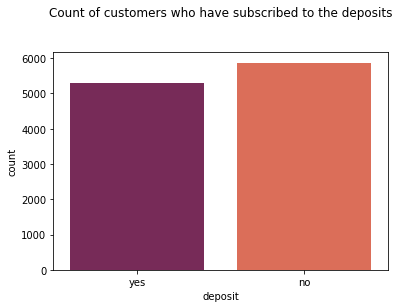

In [83]:
#distribution of variable 'deposit'
bank_data['deposit'].value_counts()
sns.countplot(x="deposit", palette="rocket",data=bank_data)
plt.title('Count of customers who have subscribed to the deposits\n\n')
# plt.rcParams.update({'font.size': 15})

People who have deposits in the bank are less than the people who dont.  The target variable 'deposit' seems to be imbalanced as the people with 'no' deposit are more than the people with deposits.

### Distribution of customers across Job Categories

Text(0.5, 0, '\nJOB CATEGORIES')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of customers across Job Categories')

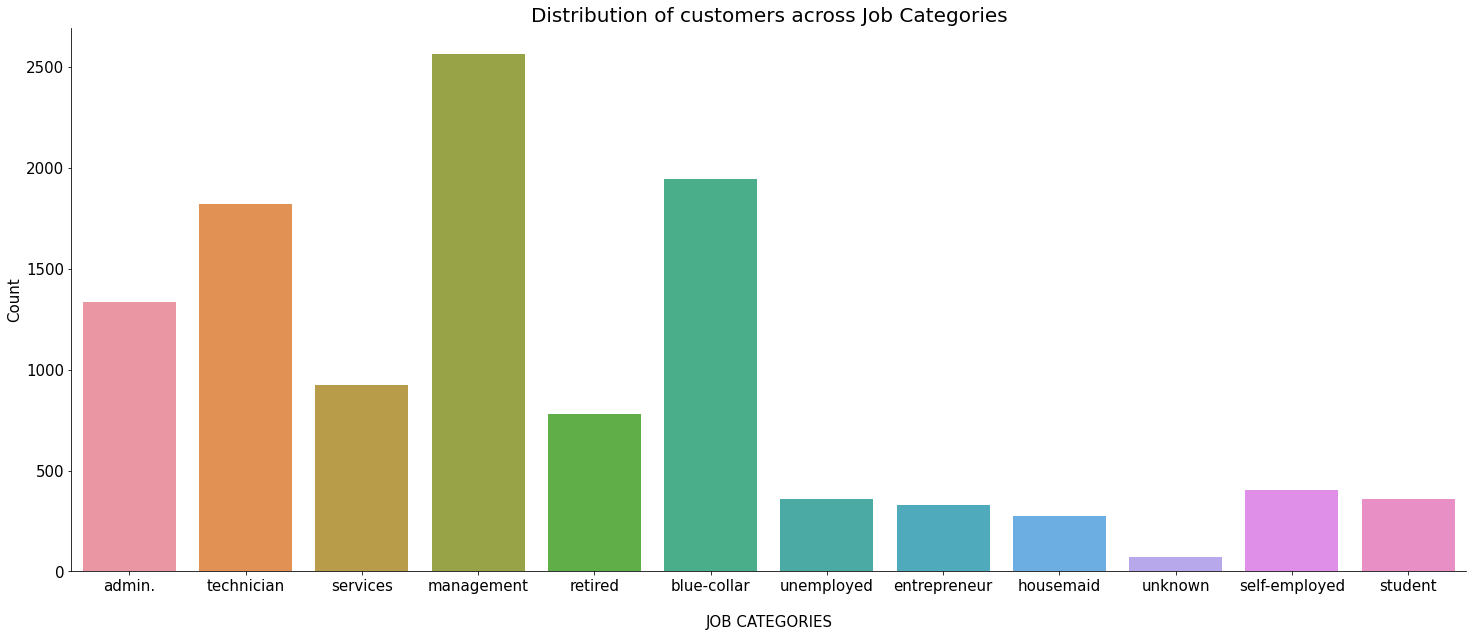

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'job', data = bank_data)
ax.set_xlabel('\nJOB CATEGORIES', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of customers across Job Categories', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()


Majority of the ank customers have a management job and then follows blue-collar jobs. The housemaids categories are the smallest categories of bank acoount holders

### Distribution of education categories among the deposit holders

Text(0.5, 0, 'Education categories')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of education categories among the deposit holders')

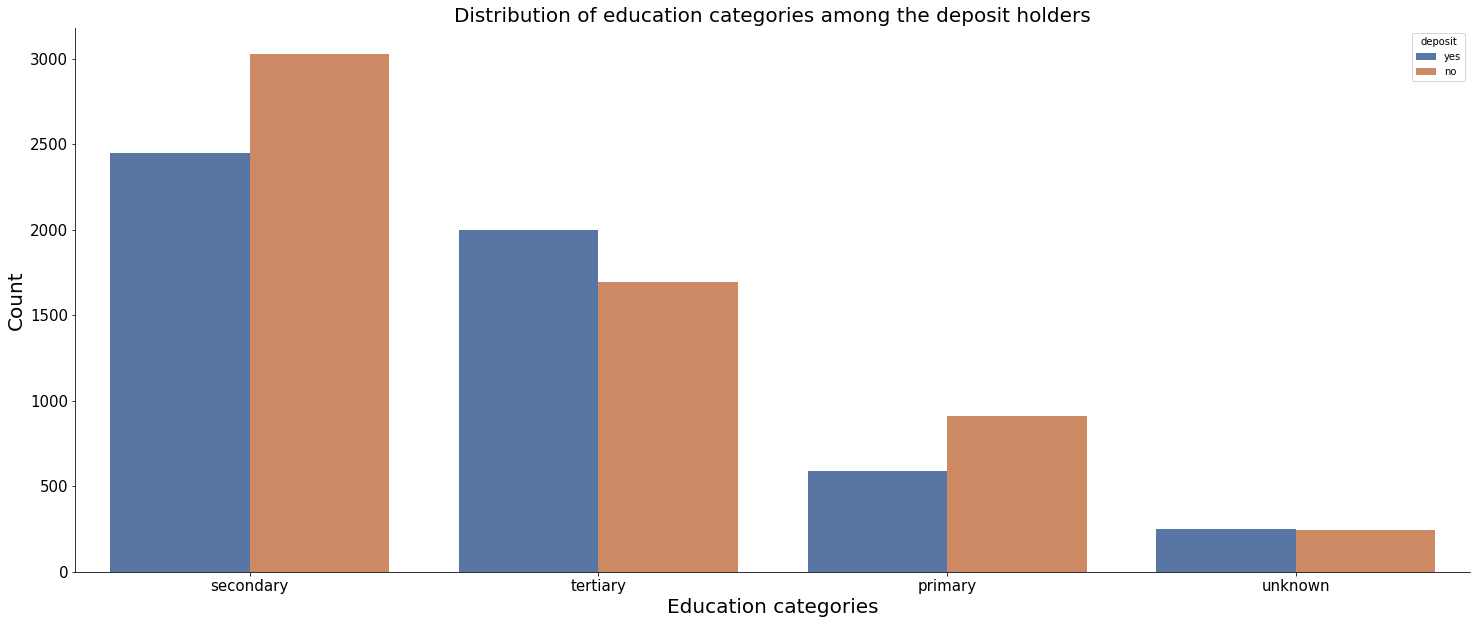

In [85]:
## Distribution of education categories among the deposit holders

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="education", hue="deposit", palette="deep",data=bank_data)
ax.set_xlabel('Education categories', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution of education categories among the deposit holders', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()


The largest customer category who have subscribed to the long term deposit have secondary degree. Then they are followed by the tertiary degree and then the primary degree holders

### Distribution of job categories among the deposit holders

Text(0.5, 0, 'Education categories')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of job categories among the deposit holders')

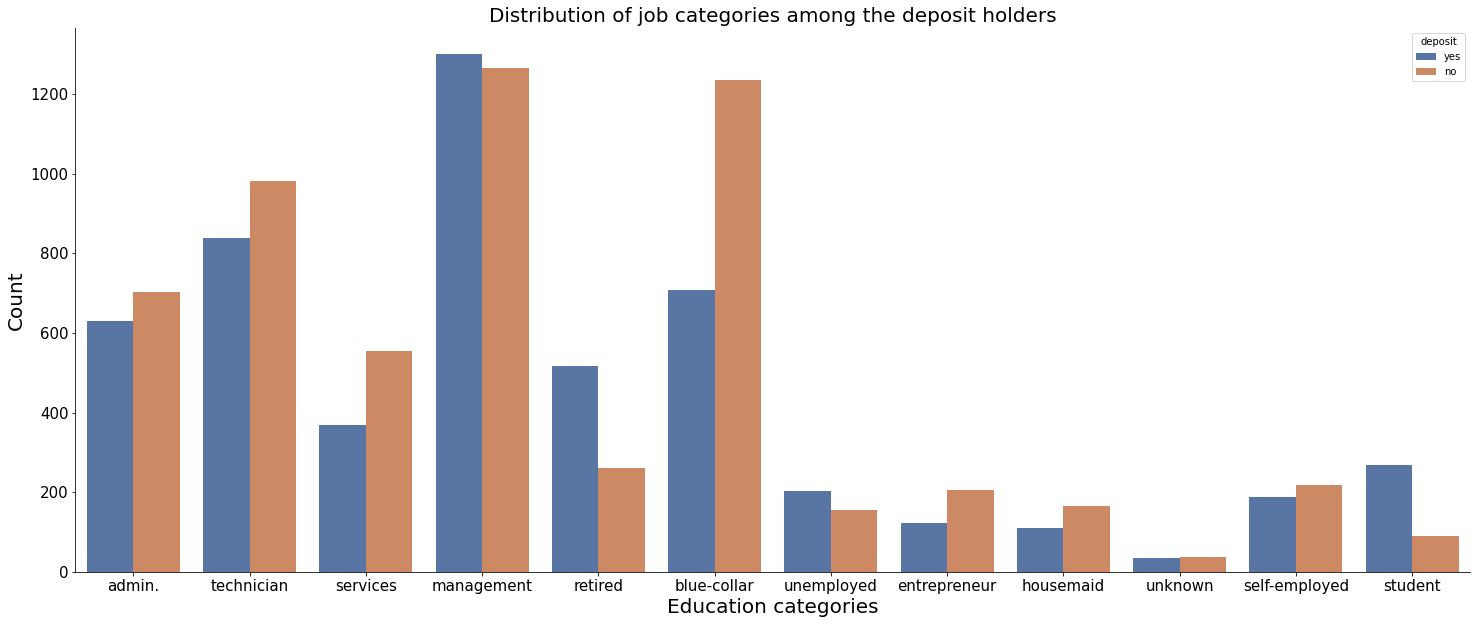

In [86]:

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="job", hue="deposit", palette="deep",data=bank_data)
ax.set_xlabel('Education categories', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution of job categories among the deposit holders', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

The majority job occupation who have subscriped to the deposits come from the management profession. The people of student profession have least subscriped to the bank loans.

### Distribution of Marital categories among the deposit holders

Text(0.5, 0, 'Marital categories')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Marital categories among the deposit holders')

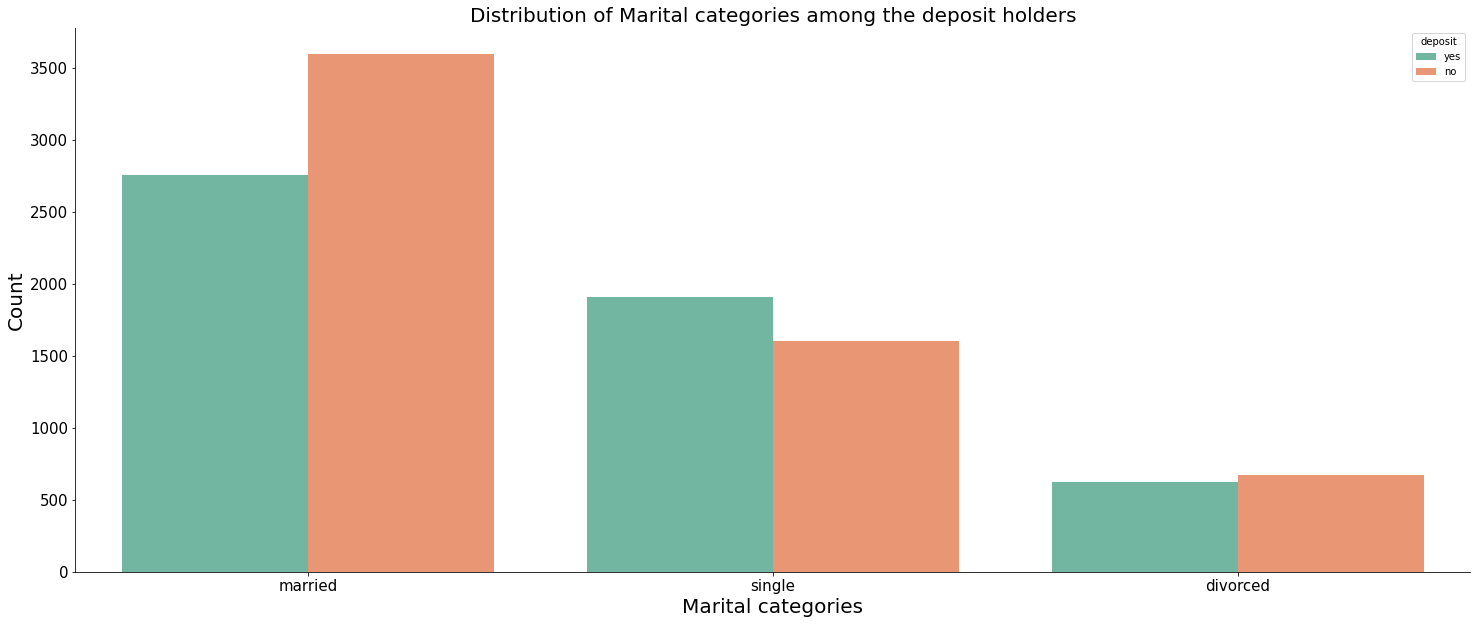

In [87]:

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="marital", hue="deposit", palette="Set2",data=bank_data)
ax.set_xlabel('Marital categories', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution of Marital categories among the deposit holders', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

Married people have subscriped more to the long term deposits than the single people or the divorced people. Among all customers, the divorced people tend to subscribe less to the deposits

### People with housing loans who have subscribed to deposits

Text(0.5, 0, 'Housing Loans')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'People with housing loans who have subscribed to deposits')

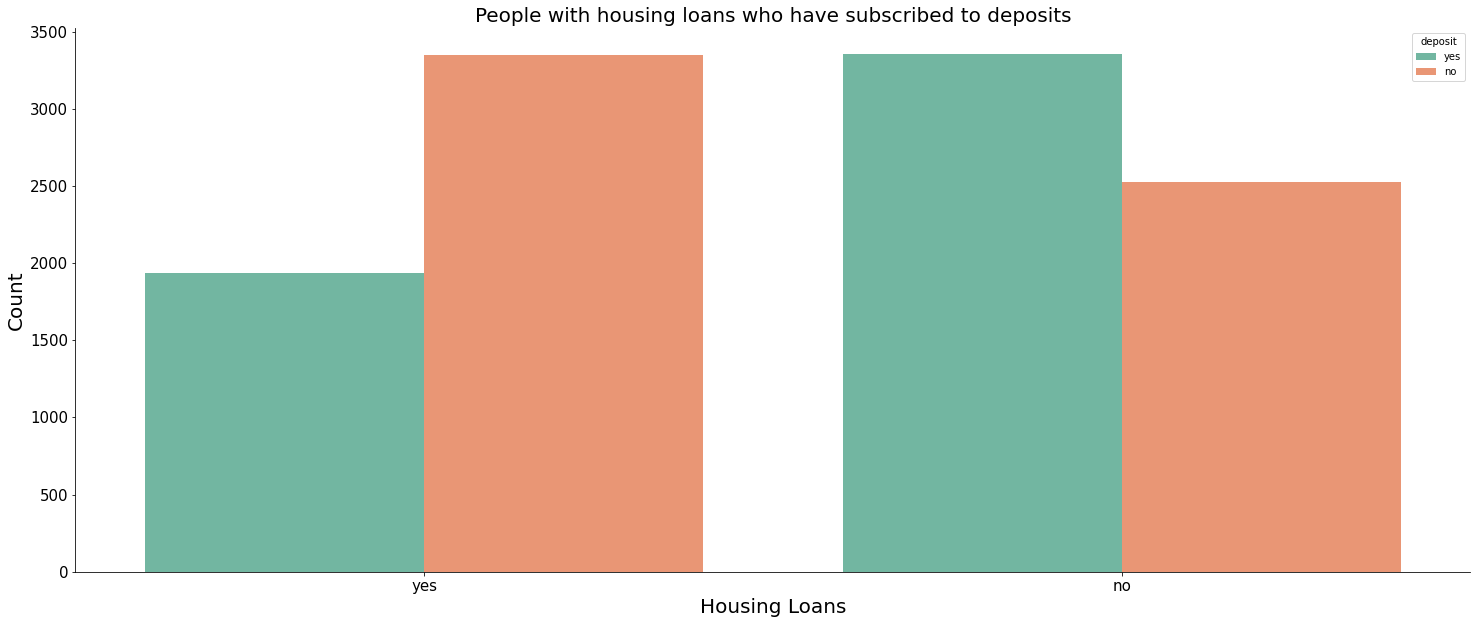

In [88]:

fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="housing", hue="deposit", palette="Set2",data=bank_data)
ax.set_xlabel('Housing Loans', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('People with housing loans who have subscribed to deposits', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

People with more housing loan tend to subscribe less to the long term deposits. This probably explains that people are not willing to commit for long term deposits when they already have a monetary commitment.

### People with defaulted loans who have subscribed to deposits

Text(0.5, 0, 'Defaulted Loans')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'People with defaulted loans who have subscribed to deposits')

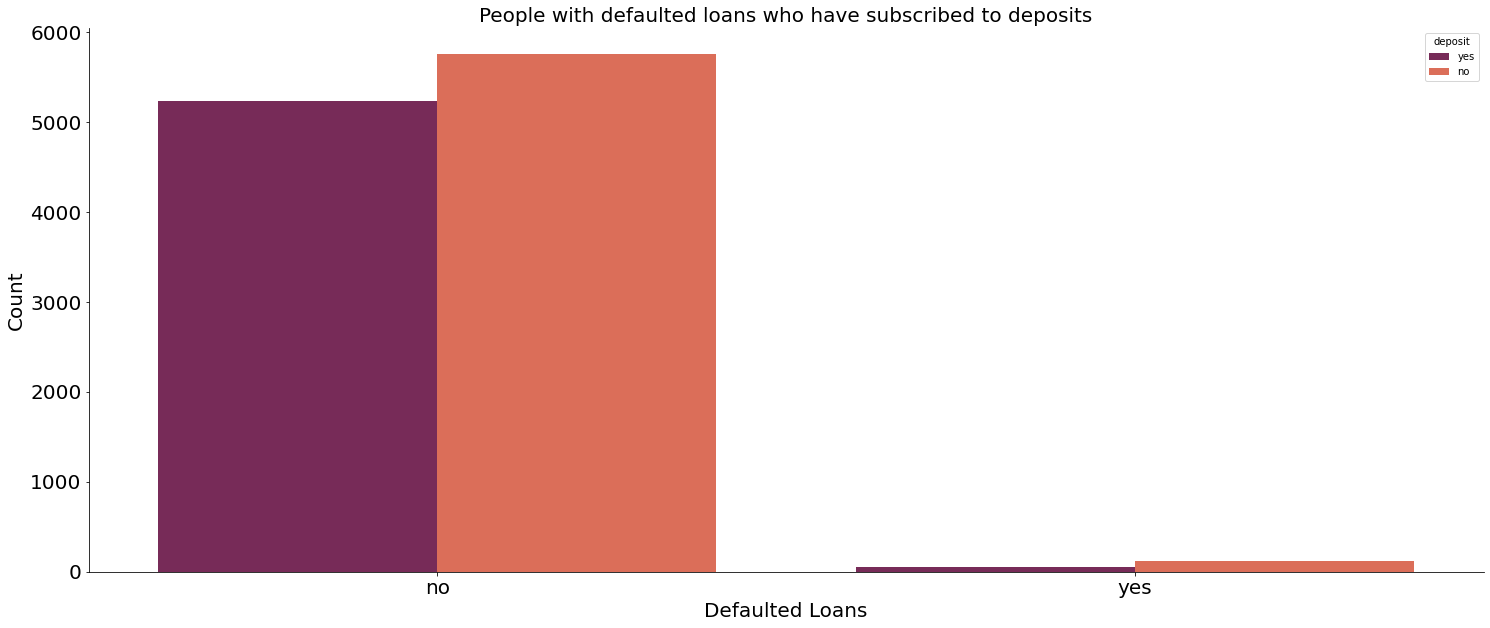

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="default", hue="deposit", palette="rocket",data=bank_data)
ax.set_xlabel('Defaulted Loans', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('People with defaulted loans who have subscribed to deposits', fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

People who have defaulted on loan have not committed to long term deposits. This again explains that people who have defaulted on loans have shortage of money and hence would not subscribe to long  term deposits. On the othe hand, people who have paid their loans and has no default loans tend to subscribe more for long term deposits.

### Subscription to deposits across Months

Text(0.5, 0, 'Month of the Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Subscription to deposits across Months')

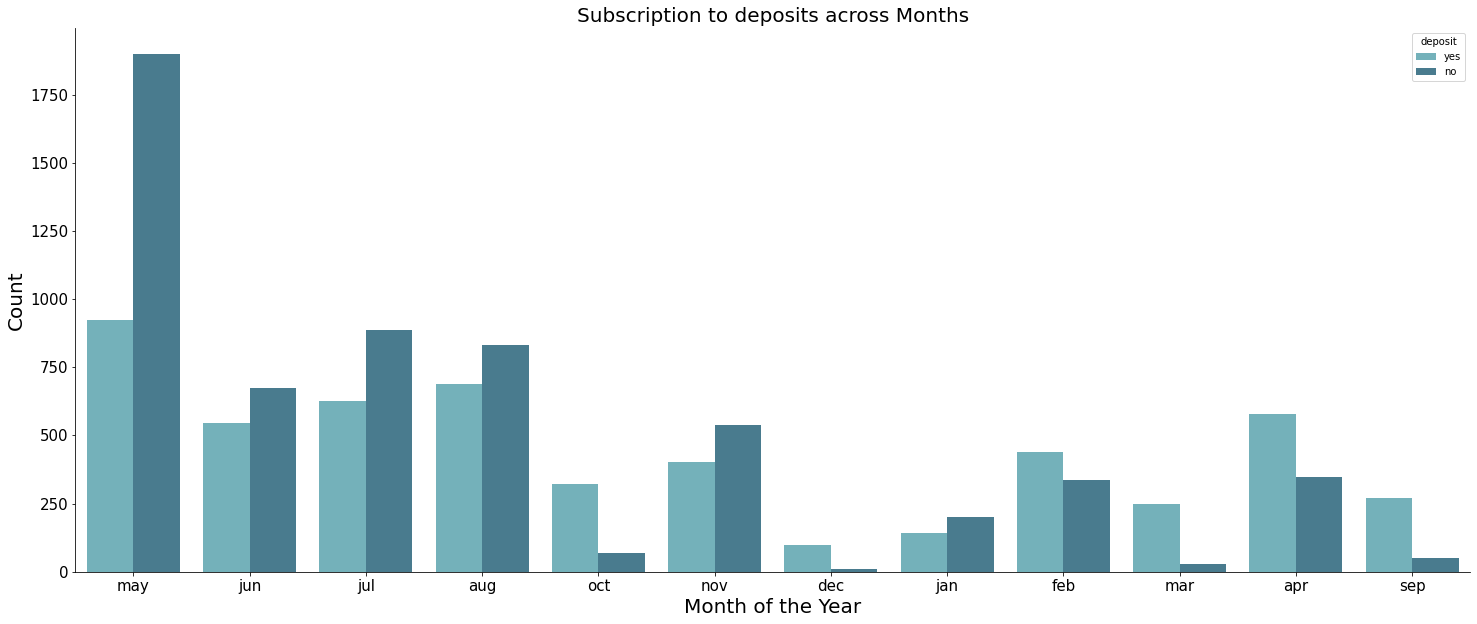

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x="month", hue="deposit", palette="GnBu_d",data=bank_data)
ax.set_xlabel('Month of the Year', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Subscription to deposits across Months', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

In the Month of May, people have subscribed to deposits more when compared to other months of the year. The month with the lowest deposit subscribers is December

### Account balance among education categories

Text(0.5, 0, 'Education Categories')

Text(0, 0.5, 'Balance Amount')

Text(0.5, 1.0, 'Account balance among education categories')

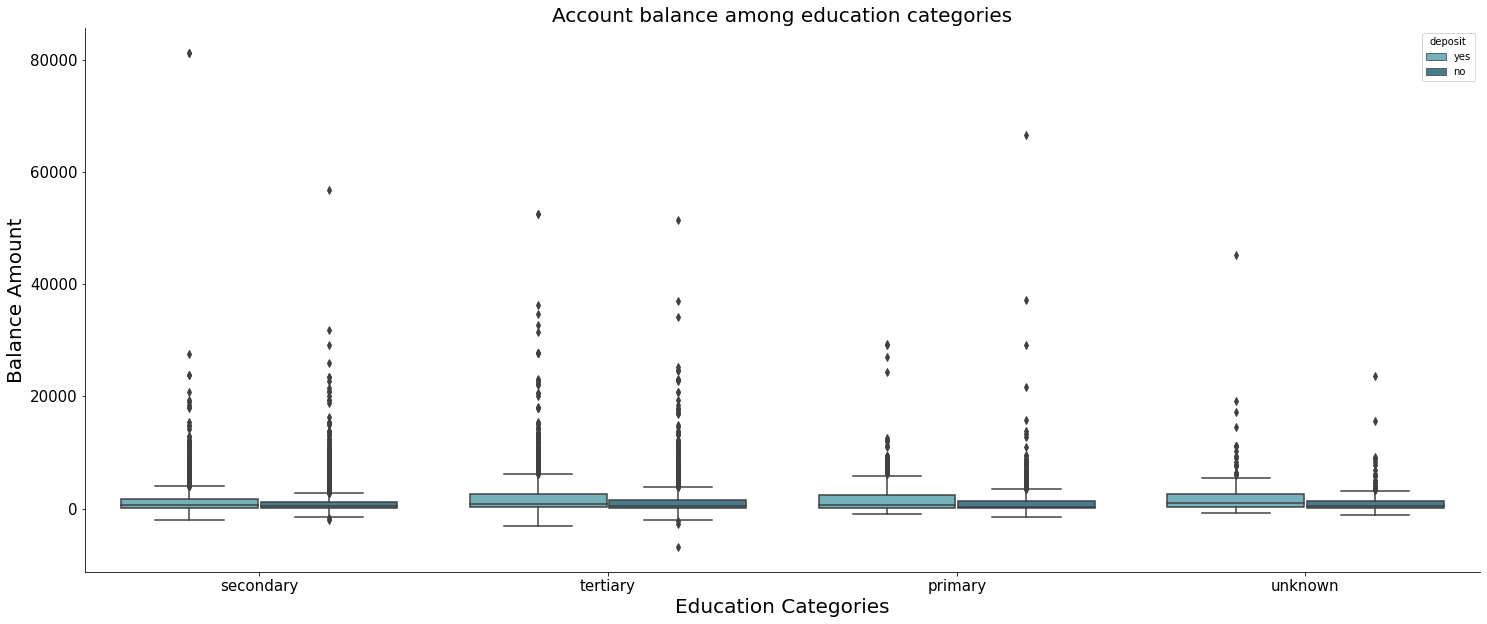

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.boxplot(x="education",y='balance', hue="deposit", palette="GnBu_d",data=bank_data)
ax.set_xlabel('Education Categories', fontsize=20)
ax.set_ylabel('Balance Amount', fontsize=20)
ax.set_title('Account balance among education categories', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

The teritary education catgeories have the highest average account balance and the people with the primary education degree have the lowest average account balance. This explains that education is an important factor and the account balance increases with the higher order degrees.

### Account balance among marital categories

Text(0.5, 0, 'Marital Categories')

Text(0, 0.5, 'Balance Amount')

Text(0.5, 1.0, 'Account balance among marital categories')

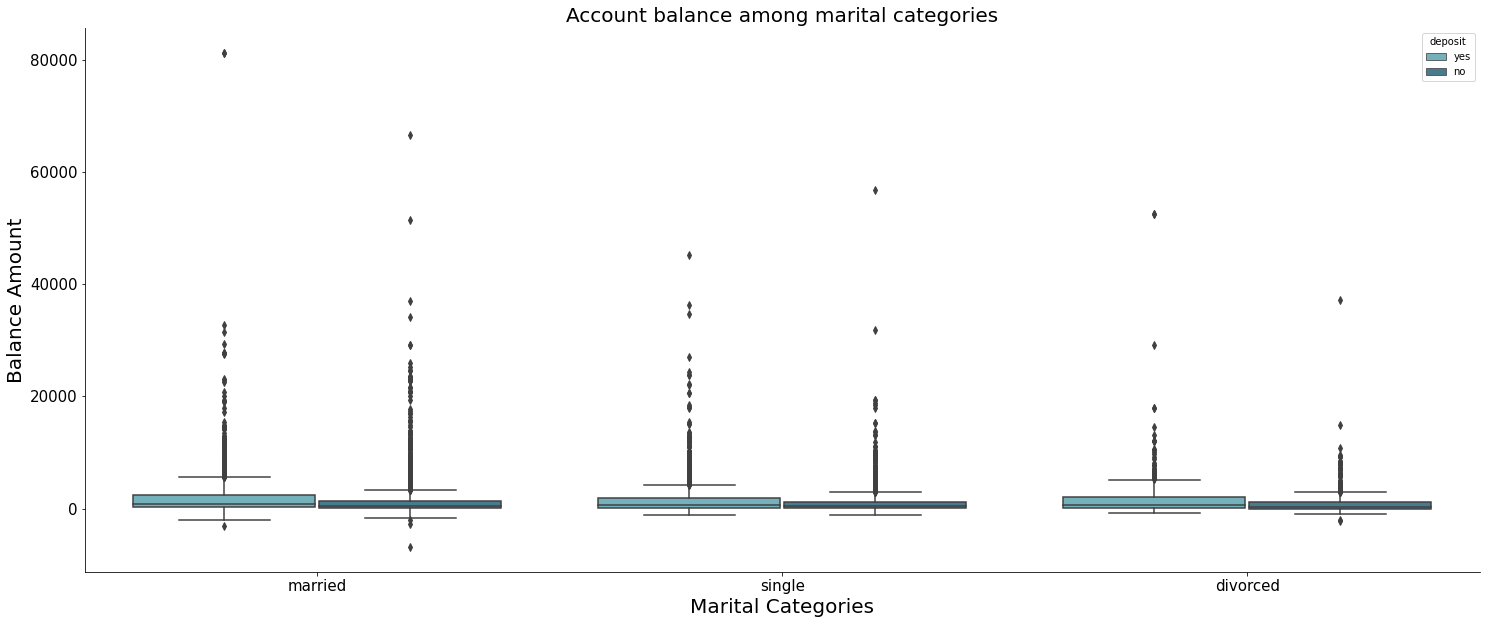

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.boxplot(x="marital",y='balance', hue="deposit", palette="GnBu_d",data=bank_data)
ax.set_xlabel('Marital Categories', fontsize=20)
ax.set_ylabel('Balance Amount', fontsize=20)
ax.set_title('Account balance among marital categories', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

Married people have the highest average account balance when compared to the single or divorced people and they also tend to subscribe more for long term deposits

## Feature Engineering

In [93]:
#creating a copy of original dataset
bank_df=bank_data.copy()


In [94]:
# Dropping the variables into numerical and categorical variable buckets.
cols_numerical=['age','balance','campaign','pdays','previous','duration']
cols_category=['job','marital','education','default','housing','loan','contact','month','day','poutcome']

### Histogram of numerical  Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd8ca3d1d0>,
      dtype=object)

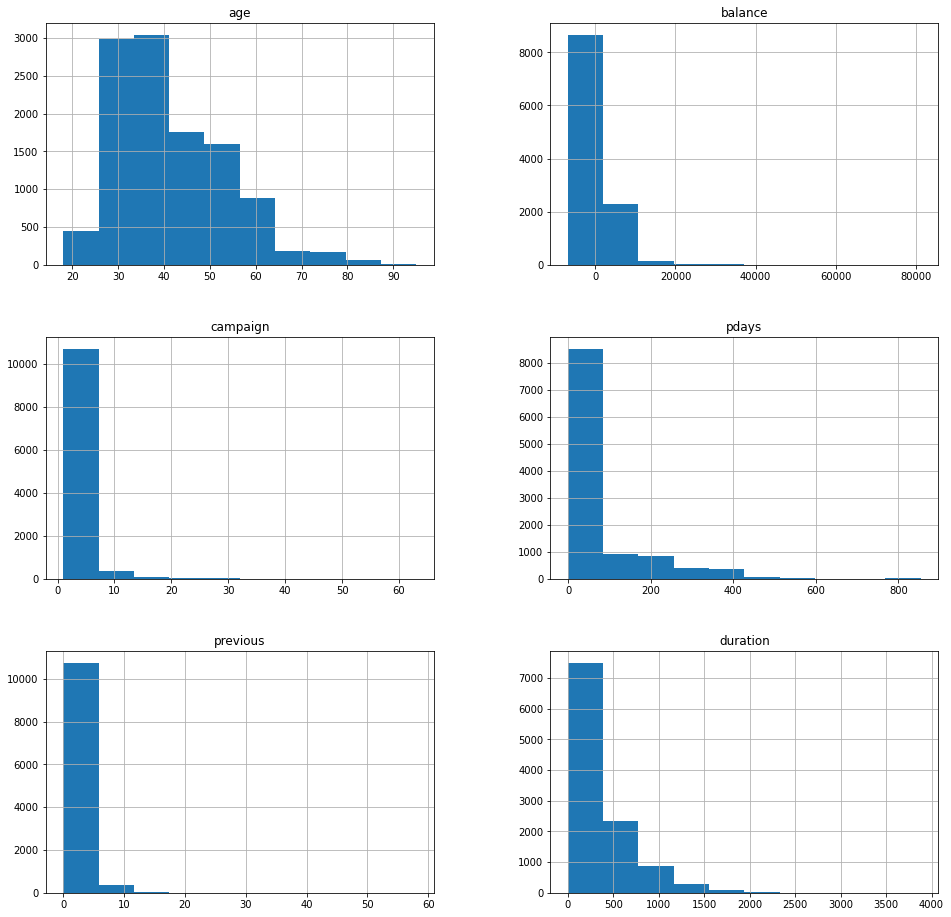

In [95]:
bank_df[cols_numerical].hist(column=cols_numerical, figsize = (16,16))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


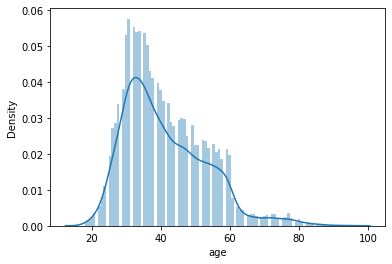

In [96]:
sns.distplot(bank_df.age, bins=100)


### Handling the categorical attributes

Converting the Features 'job','marital','education','default','housing','loan','contact','month' into numerical features.

In [97]:

bank_df = pd.get_dummies(bank_df,
                             columns=['job'], prefix=['job'],drop_first = True)

bank_df = pd.get_dummies(bank_df,
                             columns=['marital'], prefix=['marital'],drop_first = True)

bank_df = pd.get_dummies(bank_df,
                             columns=['education'], prefix=['education'],drop_first = True)
bank_df= pd.get_dummies(bank_df,
                             columns=['default'], prefix=['default'],drop_first = True)
bank_df= pd.get_dummies(bank_df,
                             columns=['housing'], prefix=['housing'],drop_first = True)
bank_df= pd.get_dummies(bank_df,
                             columns=['loan'], prefix=['loan'],drop_first = True)
bank_df = pd.get_dummies(bank_df,
                             columns=['contact'], prefix=['contact'],drop_first = True)
bank_df = pd.get_dummies(bank_df,
                             columns=['month'], prefix=['month'],drop_first = True)

In [98]:
##As the feature 'day' is insignificant to the model, we will remove it.
bank_df.drop('day',axis=1,inplace=True)

In [99]:
# feature engineering the 'duration' variable
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_df);

In [100]:
## bank_df['poutcome'] = bank_df['poutcome'].replace(['other'] , 'unknown')
bank_df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [101]:
bank_df = pd.get_dummies(bank_df,
                             columns=['poutcome'], prefix=['poutcome'],drop_first = True)

In [102]:
## ENcoding the depsoit variable as 1 and 0.
bank_df['deposit'].replace(['yes', 'no'], [1,0], inplace  = True)

In [103]:
bank_df.head().T

,0,1,2,3,4
age,59,56,41,55,54
balance,2343,45,1270,2476,184
duration,5,5,5,4,5
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
deposit,1,1,1,1,1
job_blue-collar,0,0,0,0,0
job_entrepreneur,0,0,0,0,0
job_housemaid,0,0,0,0,0


## Model building

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search import GridSearchCV
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [105]:
bank_df.shape

(11162, 42)

### Splitting the dataset into Training and Test set

In [106]:
X = bank_df.drop('deposit', axis = 1)
y = bank_df['deposit']

In [107]:
# split dataset
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [108]:
print (X_train_org.shape, y_train.shape)#scale dataset

print (X_test_org.shape, y_test.shape)

(8371, 41) (8371,)
(2791, 41) (2791,)


## Scaling the data

In [109]:
#scale dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

##  Logistic Regression 

In [110]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l2.fit(X_train, y_train)
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l2.append(log_l2.score(X_test, y_test))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
train_score_l2,test_score_l2

([0.810058535419902,
  0.8180623581412018,
  0.8190180384661331,
  0.8188985784255166,
  0.8188985784255166,
  0.8187791183849003,
  0.8187791183849003],
 [0.8093873163740595,
  0.8101039054102472,
  0.8083124328197778,
  0.8079541383016839,
  0.8083124328197778,
  0.8083124328197778,
  0.8083124328197778])

In [112]:
min_list1=[]
for x in range(0,7):
#     print(x,train_score_l1[x]-test_score_l1[x])
    ans_1=abs(train_score_l2[x]-test_score_l2[x])
    min_list1.append(ans_1)
print(min_list1)

[0.0006712190458425527, 0.007958452730954524, 0.010705605646355254, 0.010944440123832666, 0.010586145605738784, 0.010466685565122424, 0.010466685565122424]


#### Penaly factor with value of 0.01 provides the best predictive performance for the Logistic Regression

#### Graphs displaying the classification performance of the Logistic Regression.

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Calssification performance of Logistic Regression')

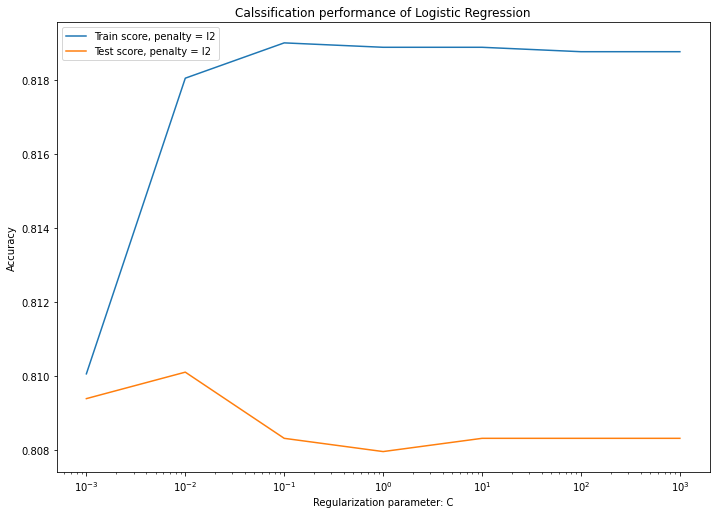

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Calssification performance of Logistic Regression')
plt.gcf().set_size_inches(11.7, 8.27)

Regularization parameter C of 0.01 provides the BEST performance.

### Using the cross validation with logistic regression.

In [114]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validation scores: [0.78459472 0.74384236 0.78181004 0.79749104 0.74014337]
Mean accuracy: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Evaluation

#### Confusion Matrix

In [115]:
#confusion matrix
cm=confusion_matrix(y_test, log_l2.predict(X_test))

Text(0.5, 1.0, 'Logistic Regression- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8be51d10>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8becfb50>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1203')

Text(1, 0, 'FP = 300')

Text(0, 1, 'FN = 235')

Text(1, 1, 'TP = 1053')

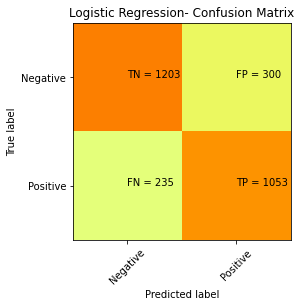

In [116]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Precision, Recall and F1 score

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, log_l2.predict(X_test), target_names=["Not Deposited", "Deposited"]))

               precision    recall  f1-score   support

Not Deposited       0.84      0.80      0.82      1503
    Deposited       0.78      0.82      0.80      1288

     accuracy                           0.81      2791
    macro avg       0.81      0.81      0.81      2791
 weighted avg       0.81      0.81      0.81      2791



#### ROC Curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

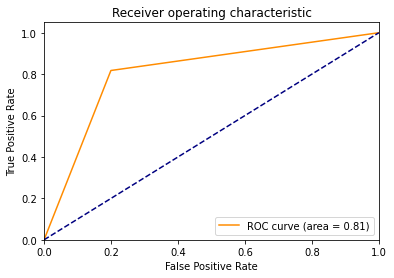

<Figure size 842.4x595.44 with 0 Axes>

In [118]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, log_l2.predict(X_test))
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

#### Area Under Curve

In [119]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, log_l2.predict(X_test))
print('AUC: %.3f' % auc)

AUC: 0.809


###  KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(15,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

#### Understanding the optimum value with the help of graph.

Text(0.5, 0, 'Value of k')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Classification performance of KNN classifier')

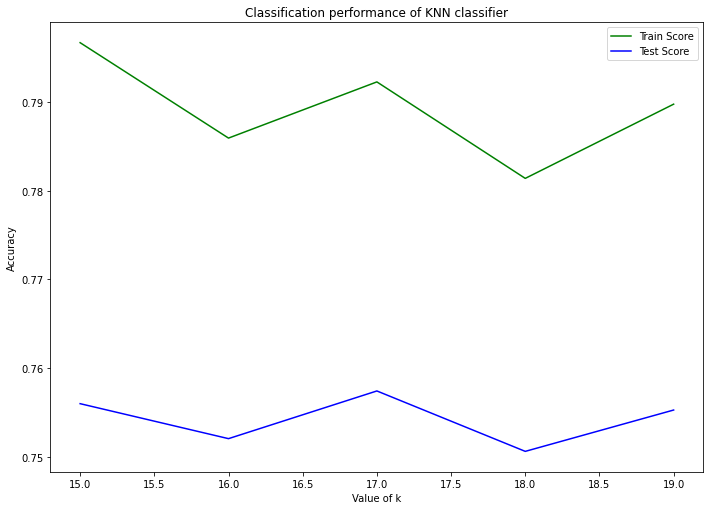

In [47]:
x_axis = range(15,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title("Classification performance of KNN classifier")
plt.legend()
plt.gcf().set_size_inches(11.7, 8.27)

From the graph we can see that for k value of 17 gives us the best classification score.

In [48]:
knn = KNeighborsClassifier(17)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

Train score: 0.7923
Test score: 0.7574


### Evaluation

#### Confusion Matrix

In [49]:
cm=confusion_matrix(y_test, knn.predict(X_test))

Text(0.5, 1.0, 'KNN Classifier- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8e28f510>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8dd730d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1212')

Text(1, 0, 'FP = 291')

Text(0, 1, 'FN = 386')

Text(1, 1, 'TP = 902')

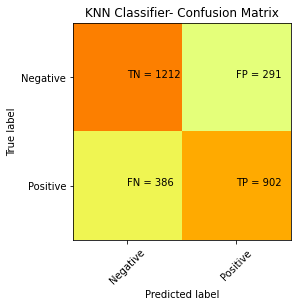

In [50]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('KNN Classifier- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Precision, Recall and F1 score

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test), target_names=["Not Deposited", "Deposited"]))

               precision    recall  f1-score   support

Not Deposited       0.76      0.81      0.78      1503
    Deposited       0.76      0.70      0.73      1288

     accuracy                           0.76      2791
    macro avg       0.76      0.75      0.75      2791
 weighted avg       0.76      0.76      0.76      2791



#### ROC Curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

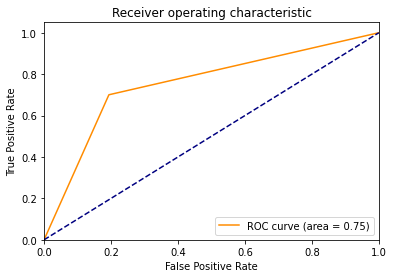

<Figure size 842.4x595.44 with 0 Axes>

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, knn.predict(X_test))
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

#### Area Under Curve

In [53]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, knn.predict(X_test))
print('AUC: %.3f' % auc)

AUC: 0.753


### Support Vector Machine with Linear and RBF kernels

### Using the Naive GridSearch to find the best result for SVC with linear kernel

In [54]:
from sklearn.svm import SVC

best_score = 0

for C in [0.001, 0.01, 0.1]:
  # for each combination of parameters, train an SVC
    svm = SVC(kernel = 'linear',C=C)
    svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
    score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best score: 0.81
Best parameters: {'C': 0.001}


#### SVM-kernel provides an accuracy of 81% with penalty factor of 0.001

### Evaluation

#### Confusion Matrix

In [55]:
cm=confusion_matrix(y_test, svm.predict(X_test))

Text(0.5, 1.0, 'SVM Classifier: Linear- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8dcb7810>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8dcb1410>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1185')

Text(1, 0, 'FP = 318')

Text(0, 1, 'FN = 215')

Text(1, 1, 'TP = 1073')

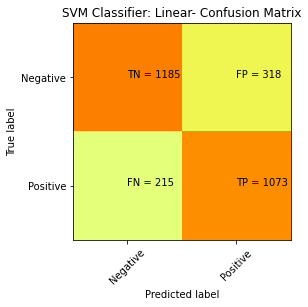

In [56]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Classifier: Linear- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Precision,Recall and F1 score

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm.predict(X_test), target_names=["Not Deposited", "Deposited"]))

               precision    recall  f1-score   support

Not Deposited       0.85      0.79      0.82      1503
    Deposited       0.77      0.83      0.80      1288

     accuracy                           0.81      2791
    macro avg       0.81      0.81      0.81      2791
 weighted avg       0.81      0.81      0.81      2791



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

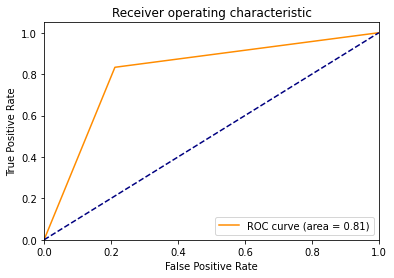

<Figure size 842.4x595.44 with 0 Axes>

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, svm.predict(X_test))
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

### Using the Naive GridSearch to find the best result for SVC with RBF kernel

In [59]:
from sklearn.svm import SVC
best_score = 0

for gamma in [0.01,10]:
    for C in [0.01,10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel = 'rbf',gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best score: 0.83
Best parameters: {'C': 10, 'gamma': 0.01}


#### SVM-RBF provides us an accuracy of 83% with parameters of gamma=0.01 and C=10

In [60]:
cm=confusion_matrix(y_test, svm.predict(X_test))

Text(0.5, 1.0, 'SVM Classifier: RBF- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8ecf00d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8e296350>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1440')

Text(1, 0, 'FP = 63')

Text(0, 1, 'FN = 1166')

Text(1, 1, 'TP = 122')

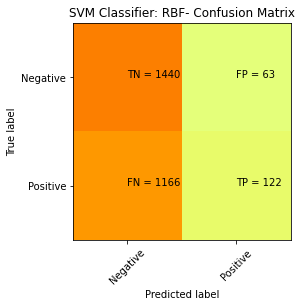

In [61]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Classifier: RBF- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

###  Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.757


#### Identifying the most important feature for classification.

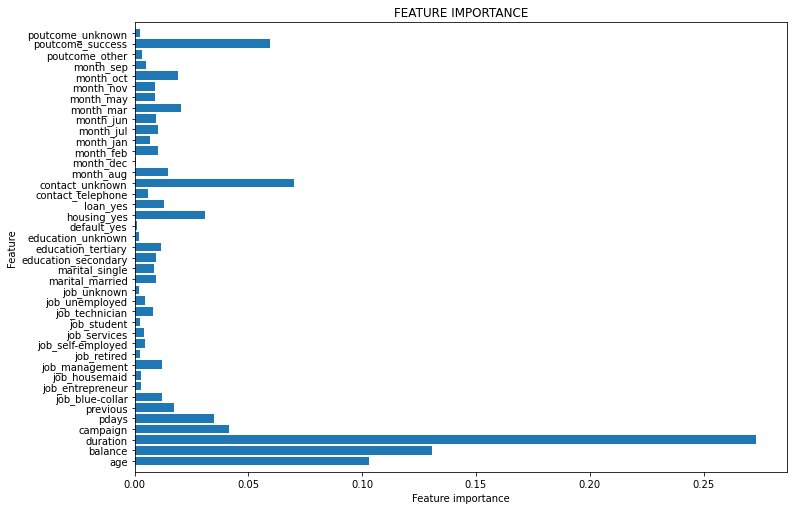

In [63]:
%matplotlib inline

def plot_feature_importances_risk(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.title("FEATURE IMPORTANCE")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_risk(dtree)
plt.gcf().set_size_inches(11.7, 8.27)

Duration of the call is an highly significant feature in the model. Then followed by features such as balance and age.

### Evaluation

#### Confusion Matrix

In [64]:
cm=confusion_matrix(y_test, dtree.predict(X_test))

Text(0.5, 1.0, 'Decision Tree Classifier- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8cf4f150>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8cf4fc90>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1163')

Text(1, 0, 'FP = 340')

Text(0, 1, 'FN = 338')

Text(1, 1, 'TP = 950')

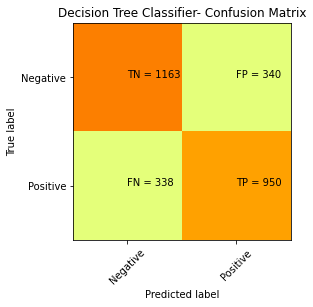

In [65]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree Classifier- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Precision,Recall and F1 score

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree.predict(X_test), target_names=["Not Deposited", "Deposited"]))

               precision    recall  f1-score   support

Not Deposited       0.77      0.77      0.77      1503
    Deposited       0.74      0.74      0.74      1288

     accuracy                           0.76      2791
    macro avg       0.76      0.76      0.76      2791
 weighted avg       0.76      0.76      0.76      2791



#### ROC Curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

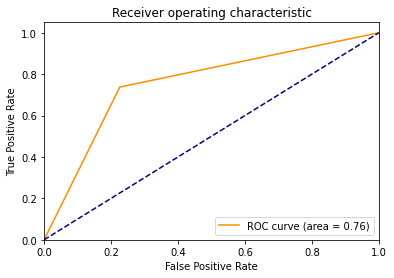

<Figure size 842.4x595.44 with 0 Axes>

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict(X_test))
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

#### Area Under Curve

In [68]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, dtree.predict(X_test))
print('AUC: %.3f' % auc)

AUC: 0.756


### Random Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_reg=rf.fit(X_train, y_train)

print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

1.0
0.8316015764958796


### Evaluation

#### Confusion Matrix

In [70]:
cm=confusion_matrix(y_test, rf.predict(X_test))

Text(0.5, 1.0, 'Random Forest Classifier- Confusion Matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7fcd8cb64890>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fcd8cb58390>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0, 0, 'TN = 1202')

Text(1, 0, 'FP = 301')

Text(0, 1, 'FN = 169')

Text(1, 1, 'TP = 1119')

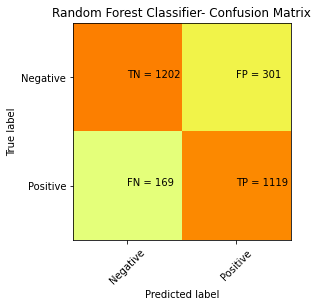

In [71]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest Classifier- Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Precision,Recall and F1 score

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf.predict(X_test), target_names=["Not Deposited", "Deposited"]))

               precision    recall  f1-score   support

Not Deposited       0.88      0.80      0.84      1503
    Deposited       0.79      0.87      0.83      1288

     accuracy                           0.83      2791
    macro avg       0.83      0.83      0.83      2791
 weighted avg       0.84      0.83      0.83      2791



#### ROC Curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

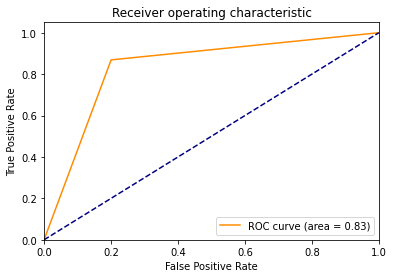

<Figure size 842.4x595.44 with 0 Axes>

In [73]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf.predict(X_test))
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

#### Area Under Curve

In [74]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf.predict(X_test))
print('AUC: %.3f' % auc)

AUC: 0.834


### Conclusion

Application of Data Mining techniques in Marketing campaigns has served as a valuable tool for the Bank Marketing Team. The Portuguese Bank data collected from 2008-2015 were analyzed and the model to predict the success of subscribing to a long-term deposit is developed. Classification models such as Logistic Regression, KNN Classifier, SVM, Decision Tree and Random Forest Classifier were  compared and evaluation metrics such as confusion matrix, Precision, Recall and ROC curve were used for model comparison. 
####  The best results were achieved by Random Forest Classifier with an accuracy of 83%, precision of 84% and Area Under Curve of 0.834